In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
# Load the Excel file
xls = pd.ExcelFile('Assignment3 Multi-dimensional representation options.xlsx')

# Read data from each sheet
sheet1 = pd.read_excel(xls, sheet_name='Strategic Relations between cou')  # Strategic relations
sheet2 = pd.read_excel(xls, sheet_name='Political Atomosphere within co')  # Political atmosphere
sheet3 = pd.read_excel(xls, sheet_name='Annual Defence Spending of coun')  # Defence spending

# Combine relevant data for easier access
combined_df = sheet3.merge(sheet2, on="CountryName", how="left")
combined_df['Spending'] = combined_df['Amount']  # For bubble size

In [7]:
color_map = {
    "Strong democracy": "blue",
    "Weak democracy": "lightblue",
    "Strong communism": "red",
    "Weak communism": "pink"
}
combined_df['Color'] = combined_df['Atmosphere'].map(color_map)

In [8]:
# Creating a graph
G = nx.Graph()

# Add nodes with attributes (Spending and Color)
for _, row in combined_df.iterrows():
    G.add_node(row['CountryName'], spending=row['Spending'], color=row['Color'])

# Add edges based on relations
for _, row in sheet1.iterrows():
    edge_type = 'solid' if 'ally' in row['Relation'].lower() else 'dashed'
    G.add_edge(row['CountryName'], row['CountryName2'], style=edge_type)

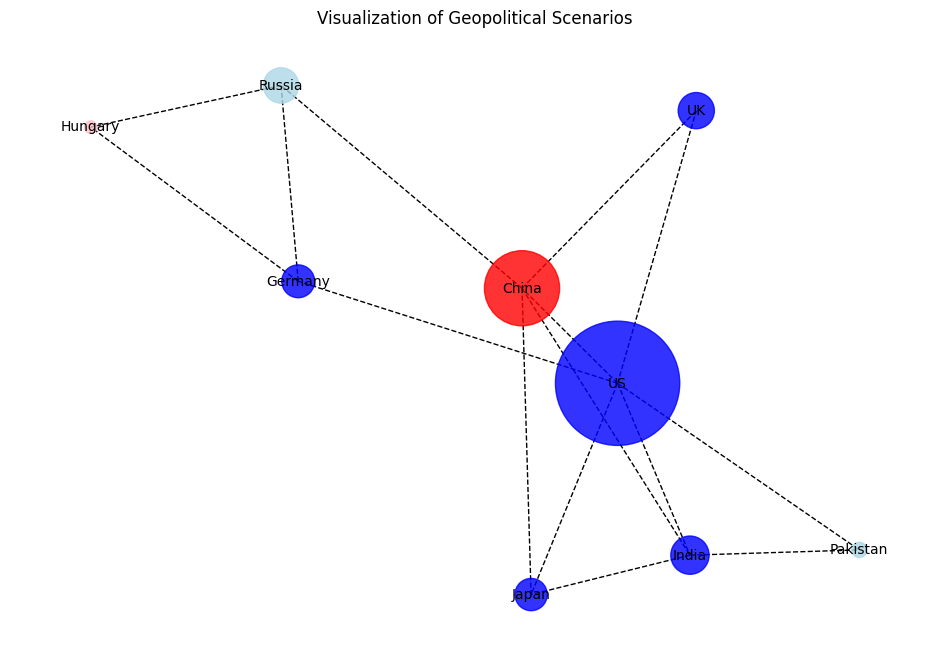

In [10]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Node positions

# Drawing nodes
spendings = [G.nodes[node]['spending'] for node in G.nodes]
colors = [G.nodes[node]['color'] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=[s * 10 for s in spendings], node_color=colors, alpha=0.8)

# Drawing edges with styles
styles = set(nx.get_edge_attributes(G,'style').values())
for style in styles:
    eset = [(u,v) for (u,v,d) in G.edges(data=True) if d['style'] == style]
    nx.draw_networkx_edges(G, pos, edgelist=eset, edge_color='black', style=style)

# Adding labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Turn off the axis
plt.axis("off")

# Title for the graph
plt.title("Visualization of Geopolitical Scenarios")

# Show the plot
plt.show()
